# Chapter 6 - Principles of Algorithm Design

Algorithms, in their simplest sense, are just sequence of actions, a list of instructions. They may just be a linear construct (do x, then do y, then do z), or conditional (`if-else`), where the future course of action is dependent upon some conditions. To this, we also add operation, iteration, the while and for statements. Expanding it further, we add recursion. Recursion can often achieve the same results as iteration, but they are fundamentally different. A recursive function calls itself, applying the same instructions to progressively smaller inputs. The input of any one recursive step is the output of the previous recursive step.

Essentially, we can say that algorithms are composed of the following four elements:
- Sequential Operations
- Actions based on the state of data structure
- Iteration, repeating an action a number of times
- Recursion, calling itself on a subset of inputs

## Algorithm desing paradigms
There are three broad approaches to algorithm design:
- Divide and Conquer
- Greedy Algorithms
- Dynamic Programming

### Divide and Conquer
Divide and conquer paradigm involves breaking a problem into smaller sub problems, and then in some way combining the results to obtain a global solution.

### Greedy Algorithms
Greedy Algorithms often involve optimization and combinatorial problems; the classic example is applying the travvelling salesperson problem, where a greedy approach always chooses the closest destination first. This shortest path strategy involves finding the best possible solution to a local problem in hope that this will lead to a global solution.

### Dynamic Programming
The dynamic programming approach is often useful when our subproblems overlap. This is different from divide and conquer. Rather than breaking our problems into independent subproblems, with dynamic programming, intermediate results are cached and can be used in subsequent operations. Like divide and conquer, it uses recursion, but allows comparision of results at different stages. This can have a performance advantage over divide and conquer for some problems because it is often quicker to retrieve a previously calculated result from memory rather than having to recalculate it. 

## Recursion and Backtracking
Recursive call is itself spinnnig off other recursive calls. At the base of the recursion, there are 2 cases: base case which tells when to terminate, and the recursive case, which calls the function they are in.

As an example, below is a simple program that recursiveley calls itself and calculates the factorial of a given number:

In [12]:
def factorial(n):
    if n in (0,):
        return 1
    f = n * factorial(n-1)
    print(' -> ', f)
    return f

In [13]:
factorial(4)

 ->  1
 ->  2
 ->  6
 ->  24


24

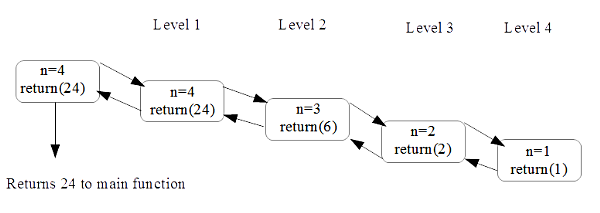

Recursion breaks a problem into smaller chuncks and them combines the result. In contrast, iteration churns away until the problem is done. 

Iterations are easier to understand than recursion, while recursion more closely represent mathematical concepts such as factorials.

### Difference between Recursion and Iterations:

<table>
    <tr>
        <td>Recursion</td>
        <td>Iteration</td>
    </tr>
    <tr>
        <td>Terminates when a base condition is reached.</td>
        <td>Terminated when a defined condition is met.</td>
    </tr>
    <tr>
        <td>Each recursive call requires space in memory.</td>
        <td>Each iteration is not stored in memory.</td>
    </tr>
    <tr>
        <td>Infinite recursion results in stack overflow error.</td>
        <td>Infinite iteration will run forever (until hardware is powered and running).</td>
    </tr>
    <tr>
        <td>Some problems are naturally better suited to recursive solutions.</td>
        <td>Iterative solutions may not be obvious.</td>
    </tr>

## Backtracking

Backtracking is a form of recursion, that is is particularly useful for types of problems such as traversing tree structures, where we a presented with a number of options at each node, from which we must choose one. Subsequently, we are presented with different types of options, and depending on the series of choices made, we must backtrack to a previous node and traverse a different branch. 

Backtracking is a divide and conquer method for exhaustive search. Importantly, backtracking prunes branches that cannot give a result. 

As an example of backtracking, here we used a recursive approach to generative all possible permutations of a given string s:

In [20]:
def bitstr(n,s):
    if (n==1):
        return s
    return [digit + bits for digit in bitstr(1,s) for bits in bitstr(n-1,s)]

In [23]:
bitstr(3,'abc')

['aaa',
 'aab',
 'aac',
 'aba',
 'abb',
 'abc',
 'aca',
 'acb',
 'acc',
 'baa',
 'bab',
 'bac',
 'bba',
 'bbb',
 'bbc',
 'bca',
 'bcb',
 'bcc',
 'caa',
 'cab',
 'cac',
 'cba',
 'cbb',
 'cbc',
 'cca',
 'ccb',
 'ccc']

It recursively concatenates each element of the initial sequence, returned when n=1, with each element of the string generated in the previous recursive call. In this sense, it is backtracking to uncover previously ingenerated combinations.

Final String returned is its n-letter combinations of the initial string.

## Divide and Conquer: Long Multiplication
Long multiplication is an iterative algorithm that we all have studied, used to multiply large numbers.

Long multiplication involved iterative multiplying and carry operations followed by a shifting and addition operation.

In the following figure, we can see that multiplying two 4 digit numbers together requires 16 multiplication operations, and we can generalise to say that $n$ digit numbers requires approximately $n^2$ operations:

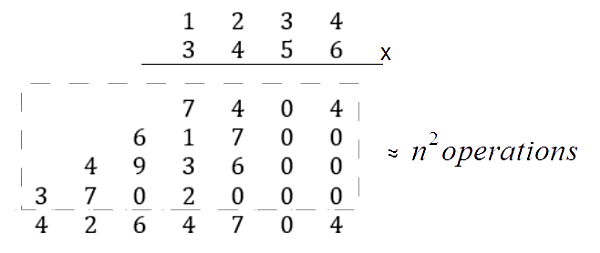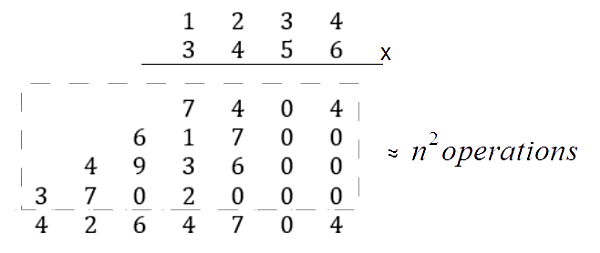

Analyzing algorithms in terms of number of computational primitives such as multiplication and addition is important because it gives a way to understand the relationship between the time it takes to complete a certian computation and the size of the input of the computation. It is called **Asymptotic Analysis** or **Time Complexity**.

### A Recursive Approach

One alternative to long division is the **Karat-Suba algorithm**. It recursively carries out multiplication operations on progressively smaller unit.

First step to recursive algorithm is to decompose a large number into several smaller numbers. A natural way of doing this is to simply split the numbers into two halves: First hald of the most significant digits and second of the least significant.

Writing a more general composition of any 2 $n$-digit numbers $x$ and $y$  using the following, where $m$ is any positive integer less than $n$:

$$ x = 10^m a + b $$
$$ y = 10^m c + d $$

So we can rewrite our multiplication problem $x$, $y$ as:
$$ (10^m a+b)(10^m c+d)$$

Expanding, we get:
$$ 10^mac+10^{2m}(ad+bc)+bd $$

We can write it as:
###### (Equation 1)
$$ 10^{2m}z_2+10^mz_1+z_0$$


Where:
$$z_2 = ac  ;  z_1 = ad+bc  ;  z_0 = bd$$

It should be pointed out that this suggests a recursive approach to multiplying two numbers since it itself involves multiplication.

There are, so far, 4 recursive multiplication steps.

We only really need to know $z_0=bd$, $z_1=ad+bc$ and $z_2=ac$ to solve the above equation.

Since $ac$ and $bd$ are already in their simplest form, it is unlikely we can eliminate these calculations.

$$(a+b)(c+d)=ac+bd+ad+bc$$

On subtracting the calculated $ab$ and $cd$, we get $(ad + bc)$

$$ ac + bd + ad + bc - ac = ad + bc $$

We can improve on the equation by reducing from four recursive steps to three:
1. Recursively calculate $ac$.
2. Recursively calculate $bd$.
3. Recursively calculate $(a+b)(c+d)$ and subtract $ac$ and $bd$.

### Python Implementation:

In [7]:
from math import log10
import math

def karastuba(x,y):
    
    # Base case for recursion
    if x < 10 or y < 10:
        return x * y
    
    # Number of digits in the highest input number
    n = max(int(log10(x)+1), int(log10(y)+1))
    
    # Rounds up to n/2
    n_2 = int(math.ceil(n/2.0))
    
    # Add 1 if n is uneven
    n = n if n%2==0 else n+1
    
    # Split input numbers
    a, b = divmod(x, 10**n_2)
    c, d = divmod(y, 10**n_2)
    
    # Applies the three recursive steps
    ac = karastuba(a,c)
    bd = karastuba(a,c)
    ad, bc = karastuba((a+b), (c+d)) - ac - bd
    
    # Perform multiplication
    return (((10**n)*ac)+bd+((10**n_2)*(ad_bc)))

Test function:

In [8]:
import random

def test():
    for i in range(1000):
        x = random.randint(1,10**5)
        y = random.randint(1,10**5)
        
        expected = x * y
        result = karastuba(x,y)
        if result != expected:
            return ("Failed")
        
        return ("Ok")

## Runtime Analysis

An important aspect of algorithm design is to gauge efficiency in terms of both space (memory) and time (no. of operations).

A platform independent way of measuring time is to measure the total operations involved, but this also depends upon the programming language, instruction set, etc.

However, if we combine this idea with the expectation that as the size of input increases, the runtime will increase in a specific way.

*There is a mathematical relationship between $n$, the size of the input, and the time it takes for the algorithm to run*

### Principles taken in consideration
- Worst case analysis. Make no assumptions on the input data. 
- Ignore or supress constant factors and lower order terms. Ar large points higher order terms dominate. 
- Focus on problems with large input sizes. 

### Worst case analysis
Worst case analysis is useful as it gives an upper bound our algorithm won't exceed, Ignoring small constant factors and lower order terms that at large values of input size $n$, do not contribute, in a large degree to the overall run time. 

#### Real world example: Merge Sort
Merge sort consists of three steps:
1. Recursively sort the left half of the input array.
2. Recursively sort the right half of the input array.
3. Merge two sorted sub arrays into one. 
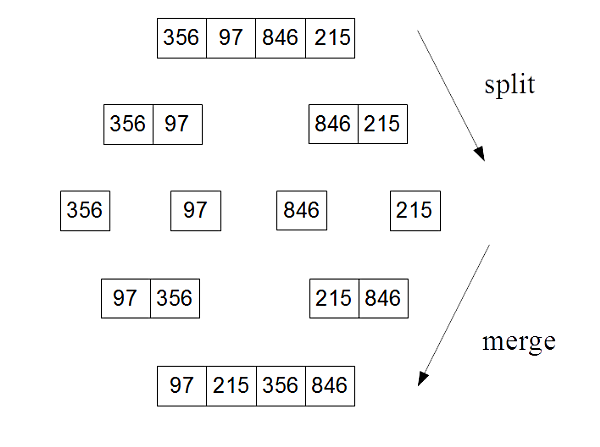

In [26]:
def mergeSort(A):
    
    # Base case: If the input array is one or zero, just return. 
    if len(A) > 1:
        
        # Splitting input array
        mid = len(A) // 2
        print(type(mid))
        left = A[:mid]
        right = A[mid:]
        
        mergeSort(left)
        mergeSort(right)
        
        # Initializing pointers for left (i), right (j) and output array (k)
        
        # Initialization operations
        i = j = k = 0
        
        # Traverse and merge the sorted array
        
        while i < len(left) and j < len(right):

            # If left < right comparision operation
            if left[i] < right[j]:         
                A[k] = left[i]
                i+=1
            else:
                # If right <= left assignment
                A[k] = right[j]
                j+=1
            k+=1
            
        while i < len(left):
            A[k] = left[i]
            i+=1
            k+=1
            
        while j < len(right):
            A[k] = right[j]
            j+=1
            k+=1
    print('Merging', A)
    return A

In [28]:
mergeSort([356,97,846,215])

<class 'int'>
<class 'int'>
Merging [356]
Merging [97]
Merging [97, 356]
<class 'int'>
Merging [846]
Merging [215]
Merging [215, 846]
Merging [97, 215, 356, 846]


[97, 215, 356, 846]

To understand this a bit better, we can map each recursive call onto a tree structure.

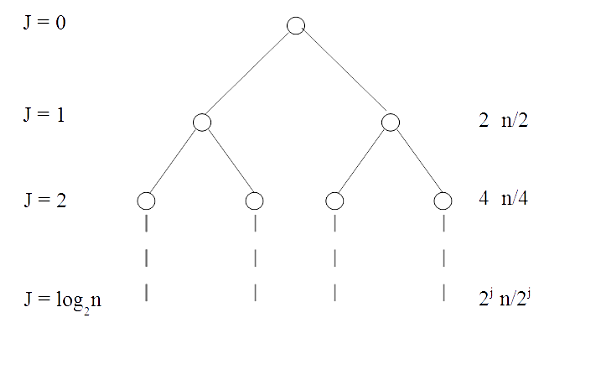

Focusing on runtime analysis at level 1, the problem is split into two n/2 sub problems, and so on. The recursion bottoms out when the array is either zero or one. The number of recursive levels is the number of times n is divided by to to get a number at most 1. This is precisely the definition of $log_2$. Since we are counting upto 0, the total number of levels is $log_2n + 1$

We are going to need to differentiate between the size of the input at subsequent reursive levels. For this, we will use the letter $m$ or specifically $m_j$ for the length of the recursive level $j$. 

Since each invocation of merge sort is making two recursive calls, the number of calls is doubling at each step. At the same time, each of these calls is working on an input that is half of its parents.

Formalizing:
> *For level j, where j is an integer $0, 1, 2, \cdots log_2n$, there are $two^j$ sub problems each size of $n/2^j$*

To calculate the total no. of operations, we need the no. of operations encompassed by a single merge of two sub arrays. 

After the two recursive calls are made, we have:
- 3 assignment operators
- 3 while loops
  - 1 if else statement - 2 Operations - Since there are only one of these sets of operations within the if-else statements, we can count this block of code as two operations carried out $m$ times.
    - 1 Comparision
    - 1 Assignment
  - 2 while loops
    - 1 assignment operation each
    
(Total of $4m+3$ operations each recursion of merge sort)

Since $m$ must be atleast 1, the upper bound for the number of operations is around $7m$.

We can also decide to count the number of operations in a different way. We have not counted increment operations or any of the housekeeping operations, but this isn't important as we are more concerned with the rate of growth og the runtime with respect to $n$ at high values of n.

To calculate the maximum number of operations at each level of the recursion tree we imple multiply the number of sub-problems by the number of operations in each sub problem as follows:
$$2^j \times7(n/2^j) = 7n$$

This shows that, cause the $2^j$ cancels out the number of operations at each level is independent of the level. This gives the upper bound to the no. of operations carried out on each level, $7n$ in this example. Note that this includes the number of operations performed by each recursive call on that level, not the reursive calls made on a subsequent level. This shows that the work done as the number of recursive calls doubles with each level, is exactly counter balanced by the fact that the input size for each sub problem is halved.

To find the total number of operations for a complete merge sort we simply multiply the number of operations on each level by the number of levels:
$$7n(\log_2n+1)$$
$$7n\log_2n+ 7$$

There is a logarithmic compenent to the relationship between the size of the input and the total running time. The distinguishing characterstic of log function is that it flattens out quickly. As an input variable, $x$, increases in size, the output variable, $y$ increases by the smaller and smaller amount. 

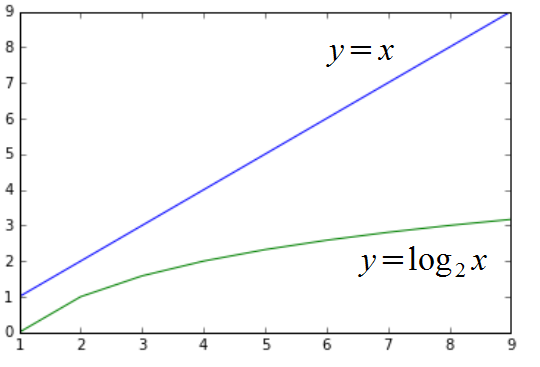

Multiplying the $n \log_2n$ component and comparing it to n^2.

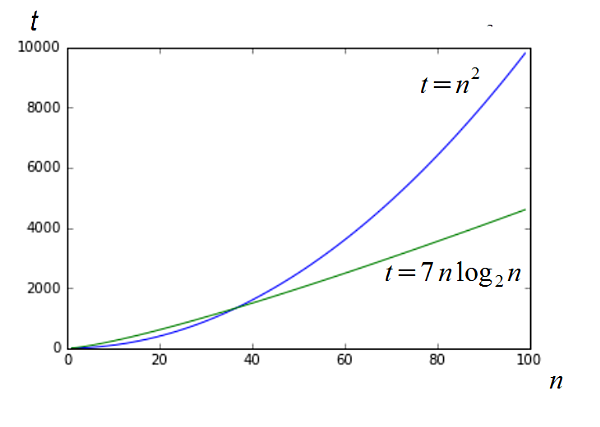

As can be seen, for very low values of $n$, the time to complete, $t$, is actually lower for an algorithm that runs in $n^2$ time. However, for values above 40, the log function begins to dominate, flattening the output until at the comparatively moderate size $n = 100$, the performance is more than twice that of an algorithm running in $n^2$ time. Notice also that the disappearance of the constant factor $+7$ is irrelevent at high values of n. 

## Asymptotic Analysis
There are essently three things that characterize an algorithm's runtime performance. They are:
- Worst Case: Use an input that gives the slowest performance.
- Best Case: Use an input that gives the best results.
- Average Case: Assumes the input is random.

We need a upper and lower bound to calculate these. For asymptotic analysis, we simply create two expressions, one each for the best and worst cases.

## The BigO Notation
O stands for order, in recognition that rates of growth are defined as the order of a function. We say that one function T(n) is a BigO notation of another function, F(n).

Definition:

$ T(n) = O(F(n)) \mbox{ if there exists constants, } n_0 \mbox{ and } C \mbox{ such that: }$
$ T(n) \leq C(F(n)) \mbox{ for all } n \geq n_0 $

The function, $g(n)$, of the input size, $n$, is based on the observation that for all sufficiently large values of $n$, $g(n)$ is bounded above by a constant multiple of $f(n)$. The objective is to find the smallest rate of growth that is less than or equal to $f(n)$. We only care about what happens at higher values of n. $n_0$ represents the threashold below which the rate of growth is not important. The function T(n) represents the **tight upper bound** $F(n)$.

In the following plot we see that $T(n) = n^2 + 500 = O(n^2)$ with $C = 2$ and $n_0$ is approximately 23:

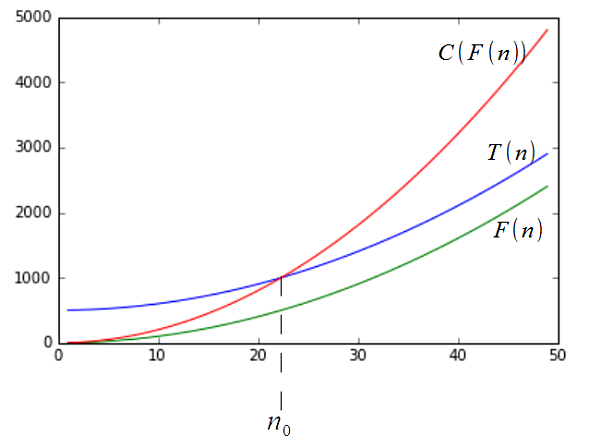



You will also see the notation $f(n) = O(g(n))$. This describes the face that the $O(g(n))$ is really just a set of functions that include all functions with the same or smaller rates of functions that include all functions with the same or smaller rate of growth than $f(n)$. For example, $O(n^2)$ also includes the functions $O(n)$, $O(n\log n)$ and so on.

### Common Growth Rates (Lowest to Highest)

<table>
    <tr>
        <td><b>Growth Rates aka Time Complexity aka Complexity Class<b></td>
        <td><b>Name<b></td>
        <td><b>Example Operations<b></td>
    </tr>
    <tr>
        <td>$O(1)$</td>
        <td>Constant</td>
        <td>append, get item, set item</td>
    </tr>
    <tr>
        <td>$O(\log n)$</td>
        <td>Logarithmic</td>
        <td>Finding an element in a sorted array.</td>
    </tr>
    <tr>
        <td>$O(n)$</td>
        <td>Linear</td>
        <td>copy, insert, delete, iteration</td>
    </tr>
    <tr>
        <td>$n\log n$</td>
        <td>Linear Logarithmic</td>
        <td>Sort a list, merge-sort</td>
    </tr>
    <tr>
        <td>$n^2$</td>
        <td>Quadritic</td>
        <td>Find the shortest path between two nodes in a graph. Nested loops.</td>
    </tr>
    <tr>
        <td>$2^n$</td>
        <td>Exponential</td>
        <td>'Towers of Hanoi' problems, backtracking.</td>
    </tr>
</table>

## Composing Complexity Classes
We normally need to find the total running time of a number of base operations. We can combine complexity class of simple operations to find that of more complex, combined operations. Goal is to analyze the combined statements in a function or meathod to understand the total time complexity class of executing several operations. 

**Example:** Consider two operations of inserting an element to into a list and then sorting the list.    
Inserting an item takes $O(n)$ time and sorting takes $O(n\log n)$ time.    
<center>Total time complexity: $O(n+n\log n)$ (i.e. bringing both functions inside $O(...)$</center>    
Since we are only interested in highest order term, so this leaves us with just $O(n\log n)$.

If we repeat and operation (example, in a while loop), we multiply the complexity class by the number of times the operation is carried out. If an operation with time complexity $O(f(n))$ is repeated $O(n)$ times, them we multiply the two complexities:
$$O(f(n) * O(n)) = O(nf(n))$$
For example, suppose $f(...)$ has a time complexity of $O(n^2)$ and it is executed $n$ times in a while loop as follows:    

    for i in range(n):
        f(...)
        
Time complexity of this loop becomes $O(n^2) * O(n) = O(n * n^2) = O(n^3)$

A single nested loop will run $n^2$ times, assuming both loops run $n$ times.

    for i in range(0,n):
        for j in range(0,n):
            # Statements

Each statement is a constant, $c$ executed $nn$ times, so we can express the running time as:
$$ cn n = cn^2 = O(n2) $$

For consecutive statements within nested loops we add the time complexities of each statement and multiply by the number of times the statement executed.

    for i in range(0,n):
        print(i)

    # Executes n times
    for i in range(0,n):
        # Executes n times
        for j in range(0,n):
            print(j)
            
This can be written as $c_0 + c_1n + cn^2 = O(n^2)$.

We can define base 2 logarithmic complexity, reducing the size of the problem by $\frac{1}{2}$ in constant time. For example, consider:

In [1]:
n = 10

In [2]:
i = 1
while i <=n:
    i=i*2
    print(i)

2
4
8
16


If we double n, it prints 5 numbers.

In [3]:
n = 20

In [4]:
i = 1
while i <=n:
    i=i*2
    print(i)

2
4
8
16
32


With each doubling of $n$, the number of iterations is only increased by 1. If we assume $k$ iterations, we can write this as follows:
$$ \log_2(2^k) = \log_2n$$
$$ klog_2 = \log_2n$$
$$k = \log n$$

From this, we can conclude that the total time = $O(log(n))$.

Although Big O is most used notation involved in Asymptotoc Analysis, there are two other notations: Omega Notation and Theta Notation 

## Omega Notation
In a similar way that BigO Notation describes the upper bound, Omega notaion describes a **tight lower bound**

Definition:

$ T(n) = \Omega (f(n)) \mbox{ iff there exists positive constants, } n_0 \mbox{ and } C \mbox{ such that O } \leq C(F(n)) \leq T(n) \mbox{ for all } n \geq n_o $

The objective is to give the largest rate of growth that is equal to or less than the given algorithms, $T(n)$, rate of growth.

## Theta Notation
It is often the case where both the upper and lower bounds of a given function are the same and the purpose of Theta notation is to determine if this is the case. The definition is as follows:
$ T(n) = \Theta(F(n)) \mbox{ iff there exists positive constants, } n_0, C_1 and C_2 \mbox{ such that: } 0 \leq C_1(F(n)) \leq C_2(F(n)) \mbox { for all } n \geq n_0 $

Although Omega and Theta notations are required to completely describe growth rates, the most particularly useful is BigO Notation and this is the one that will be see most often.

## Amortized Analysis
Often, we are not interested in time complexity of indivisual operations, but the time averaged running time of them in sequences of operations. This is called amortized analysis. It is different from average case analysis a it makes no assumptions regarding data distribution of input values. It takes into account the state change of data structures, as it analyses sequences of operations, rather then simply aggregating single operations.

Amortized Analysis finds upprt bound on runtime by imposing an artificial cost on each operation in a sequence of operations and then combining each of these costs. The artificial cost of a sequence takes in to account that the initial expensive operations can make subsequent operations cheaper. 

When we have a small number of expensive opertaions, such as sorting, and lots of cheaper operations such as lookups, standard worst case analysis can lead to overly pessimistic results. We should take into account that we can sort list to make subsequent find operations cheaper.

In our runtime analysis, we have assumed that the input data was completely random and have only looked at the effect the size of the input has on runtime. There are two other common approaches to algorithm analysis:
- Average Case Analysis
- Benchmarking

### Average Case Analysis 
It finds average running time based on some assumptions regarding relative frequencies of various input values. Using real world data, is many times on a particular data distribution and the average running time is calculated.

### Benchmarking
Benchmarking is simply having an agreed set of typical inputs that are used to measure performance. Both this and Average Case analysis require some domain knowledge. We need to know what the typical or expected datasets are. Ultimately we will try to find ways to improve performance by find tuning to a very specific application setting.

#### Benchmarking an Algorithm's Performance 
This can be done by simply timing how long the algorithm takes to complete to complete given various input sizes. As we mentioned earlier, this way of measuring runtime performance is dependent on the hardware that it is run on. However, the relative growth rates as we increase the input input size will retain charactersitics of algorithm itself rather than the hardware its run on. 

*Example:* 

We calculate the time each iteration takes (using `timeit.timeit` function):

In [9]:
def nest(n):
    for i in range(n):
        for j in range(n):
            i+j

In [10]:
import timeit

def test2(n):
    ls = []
    
    for n in range(n):
        t = timeit.timeit("nest(" + str(n) +")", setup="from __main__ import nest", number = 1)
        ls.append(t)
    return ls

Graphing the Results:

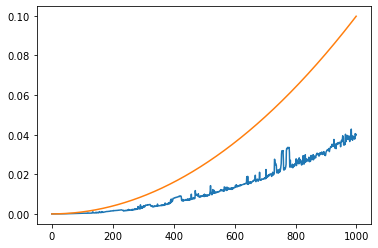

In [11]:
import matplotlib.pyplot as plt

n = 1000
plt.plot(test2(n))
plt.plot([x*x/10000000 for x in range(n)])

## Summary

We saw:
- General Overview of Algorithm Design
- Independent way to measure performance.
- Different appoaches to algorithmic problems.
- Recursively multiply large numbers and also a recursive approach for mergesort.
- Using bactracking for exhaustive search and generate string.
- Idea of benchmarking and a simple platform depended way to measure runtime. 